 # OBJECTIVE :- Implement SGD on Linear Regression

In [0]:
# load libraries
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [0]:
# description  about the boston dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# loading of data
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
# Shape of dataset
print(boston.data.shape)

(506, 13)


In [0]:
# Features of dataset
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [0]:
# Shape of target values
print(boston.target.shape)

(506,)


### Data Standardization

In [0]:
# Feature matrix
data = boston.data

# Standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
standardised_data = sc.fit_transform(data)

# Adding a new feature to the data which will contain only ones for ease in computation 
new_feature = np.ones(boston.data.shape[0])

# Matrix having new additional feature X0 which will be multiplied with W0 for the ease of computation
feature_data = np.vstack((new_feature,standardised_data.T)).T

# Actual prices of houses
target_price = boston.target

### Splitting of data

In [0]:
# Train and Test split of data
from sklearn.model_selection import train_test_split
X=feature_data
Y=target_price

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state = 5) # this is random splitting
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(339, 14)
(167, 14)
(339,)
(167,)


# Implementing SGD on LINEAR REGRESSION

In [0]:
# Initialising weight vector
# Generating 14 normally distributed values
weight = np.random.normal(0,1,feature_data.shape[1])

# Initialised Weights
weight

array([ 1.14662644,  1.86624803, -1.00155201, -0.49583435, -0.39409395,
        0.11977015, -0.54445594, -1.29733905, -1.84292468,  1.06841534,
       -0.60699636, -0.99824253, -1.1324666 , -0.97332567])

In [0]:
# Temporary vector to store intermediate computed weight values
temp_w = np.zeros(feature_data.shape[1])

# Initialising learning rate
r = 0.01

# Number of training examples
n = X_train.shape[0]

# Code to get batches for Stochastic Gradient Descent
# batch size
batch_size = 20
from numpy import random
random_ids = random.choice(n,n,replace=False)
X_shuffled = X_train[random_ids,:]
y_shuffled = y_train[random_ids]
mini_batches = [(X_shuffled[i:i+batch_size,:], y_shuffled[i:i+batch_size]) for i in range(0, n, batch_size)]


# Number of iterations for training the data
iterations = 1000

# SGD
while(iterations >=0):
    for batch in mini_batches:
        X_batch = batch[0]
        Y_batch = batch[1]
        for j in range(0,feature_data.shape[1]):
            temp_sum = 0
            for i in range(0,X_batch.shape[0]):
                temp_sum += (( (np.sum( sc.inverse_transform(weight[1:14] * X_batch[i,1:])) + weight[0]*X_batch[i,0]) - Y_batch[i]) * X_batch[i,j])
            temp_w[j] = weight[j] - ((r/X_batch.shape[0])*temp_sum)
        weight = temp_w
    iterations -= 1 
    
# Weights of manual sgd
manual_sgd_weights = weight

In [0]:
# Now predicting the house prices on X_test data
manual_sgd_predictions = np.zeros(X_test.shape[0])
for itr in range(0,X_test.shape[0]):
    manual_sgd_predictions[itr] = np.sum(sc.inverse_transform(weight[1:14]*X_test[itr,1:])) + weight[0]*X_test[itr,0]

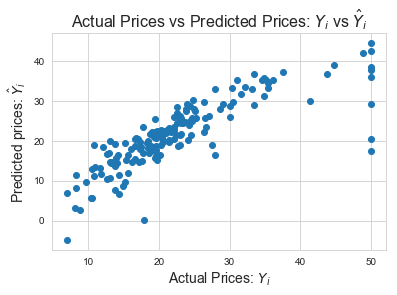

In [0]:
# Plotting the Scatter plot of Actual Price VS Predicted Price
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(y_test, manual_sgd_predictions)
plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=16)
plt.show()

### Delta error

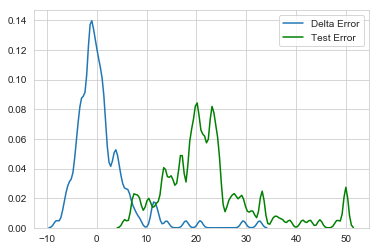

In [0]:
delta_y = y_test - manual_sgd_predictions;

import seaborn as sns;
import numpy as np;
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y), bw=0.5, label = "Delta Error")
sns.kdeplot(np.array(Y_test),color="g", bw=0.5, label = "Test Error")

plt.show()

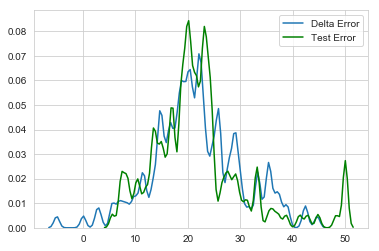

In [0]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(manual_sgd_predictions), bw=0.5,label = "Delta Error")
sns.kdeplot(np.array(Y_test),color="g", bw=0.5, label = "Test Error")

plt.show()

In [0]:
# Calculating accuracy for Implementation of SGD from Scratch
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error  of SGD is : ",mean_absolute_error(y_test, manual_sgd_predictions))
print("Mean Squared Error  of SGD is : ",mean_squared_error(y_test, manual_sgd_predictions))
print("Root Mean Squared Error of SGD  is : ",np.sqrt(mean_squared_error(y_test,manual_sgd_predictions)))

Mean Absolute Error  of SGD is :  3.4515605025284346
Mean Squared Error  of SGD is :  31.215629394821633
Root Mean Squared Error of SGD  is :  5.587094897603014


 # Implementing SKLEARN's SGD Regression

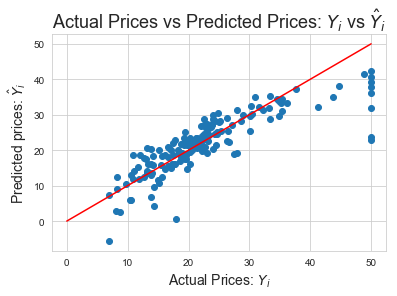

In [0]:
from sklearn.linear_model import SGDRegressor
sgd = SGDRegressor(penalty='none', max_iter=1000, learning_rate='constant' , eta0=0.001  )
sgd.fit(X_train, y_train)

sklearn_sgd_predictions = sgd.predict(X_test)

# Weights of Sklearn's SGD
sklearn_sgd_weights = sgd.coef_ 

plt.scatter(y_test, sklearn_sgd_predictions)
plt.plot([0,50],[0,50], 'r-')  #plotting a straight line for the Grid size 50*50

plt.xlabel("Actual Prices: $Y_i$",size=14)
plt.ylabel("Predicted prices: $\hat{Y}_i$",size=14)
plt.title("Actual Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$",size=18)
plt.show()

### Delta Error

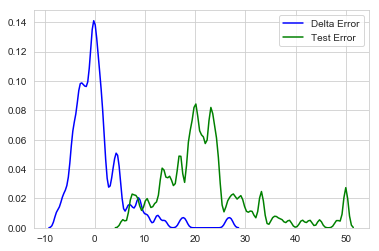

In [0]:
delta_y = y_test - sklearn_sgd_predictions;
sns.set_style('whitegrid')

sns.kdeplot(np.array(delta_y),color="b", bw=0.5, label = "Delta Error")
sns.kdeplot(np.array(Y_test),color="g", bw=0.5, label = "Test Error")

plt.show()
plt.show()

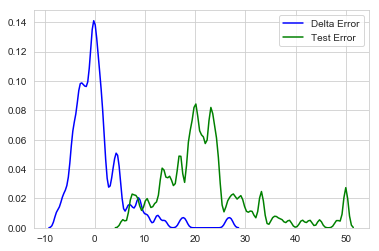

In [0]:
sns.set_style('whitegrid')
sns.kdeplot(np.array(delta_y),color="b", bw=0.5, label = "Delta Error")
sns.kdeplot(np.array(Y_test),color="g", bw=0.5, label = "Test Error")

plt.show()

In [0]:
# Calculating accuracy for Implementation of SGD using SKLEARN
from sklearn.metrics import mean_absolute_error,mean_squared_error

# calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE)
print("Mean Absolute Error  of SGD using SKLEARN is : ",mean_absolute_error(y_test,sklearn_sgd_predictions))
print("Mean Squared Error of SGD using SKLEARN is : ",mean_squared_error(y_test, sklearn_sgd_predictions))
print("Root Mean Squared Error  of SGD using SKLEARN is : ",np.sqrt(mean_squared_error(y_test,sklearn_sgd_predictions)))

Mean Absolute Error  of SGD using SKLEARN is :  3.4587965249833004
Mean Squared Error of SGD using SKLEARN is :  28.292589665652486
Root Mean Squared Error  of SGD using SKLEARN is :  5.319077896182052


# CONCLUSION:

In [0]:
# Creating the table using PrettyTable library
from prettytable import PrettyTable

# Initializing prettytable
ptable = PrettyTable()

# Adding columns
ptable.add_column("Weight of Manual SGD",manual_sgd_weights)
ptable.add_column("Weight of Sklearn's SGD",sklearn_sgd_weights)

# Printing the Table
print(ptable)

+-----------------------+-------------------------+
|  Weight of Manual SGD | Weight of Sklearn's SGD |
+-----------------------+-------------------------+
|   -888.7692261497455  |    11.159011617715132   |
|  -0.12248992770810792 |    -1.323062420064006   |
|  0.05472213300998218  |    0.887461902205865    |
| -0.044377807372948205 |   -0.14757886294030198  |
|   0.5702479008631773  |    0.197834804822469    |
|  -12.408399133451509  |   -1.4829644631445003   |
|   5.325220329562596   |    2.7766838637128695   |
| -0.036512567231625666 |   -0.31060461438872256  |
|   -1.523529367835524  |   -2.8964140077060567   |
|  0.28631782895466057  |    3.004976871282351    |
|  -0.01597613820337688 |   -2.2433720510208315   |
|  -0.7342356497147806  |   -2.1056790906922567   |
|  0.015057508634662233 |    1.0991238168030935   |
|  -0.2779433700364031  |   -3.3461318830823634   |
+-----------------------+-------------------------+


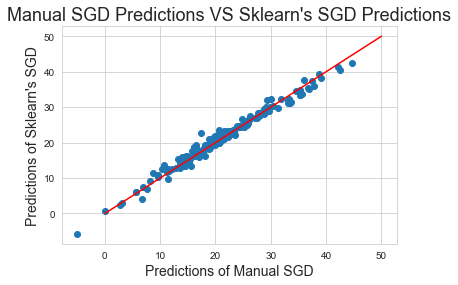

In [0]:
# Scatter Plot of the predictions of both manual SGD Regression and Sklearn's SGD Regression
plt.scatter(manual_sgd_predictions, sklearn_sgd_predictions)
plt.xlabel("Predictions of Manual SGD",size=14)
plt.ylabel("Predictions of Sklearn's SGD",size=14)
plt.title("Manual SGD Predictions VS Sklearn's SGD Predictions",size=18)
plt.plot([0,50],[0,50], 'r-')  #plotting a straight line for the Grid size 50*50

plt.show()

In [0]:
#http://zetcode.com/python/prettytable/


from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Mean Squared Error of SGD ", "Mean Squared Error of Sklearn's SGD"]
x.add_row([31.215,28.292])
print(x)

+----------------------------+-------------------------------------+
| Mean Squared Error of SGD  | Mean Squared Error of Sklearn's SGD |
+----------------------------+-------------------------------------+
|           31.215           |                28.292               |
+----------------------------+-------------------------------------+
